In [1]:
from numpy import *
import operator
import os
from os import listdir
from os import path
from os import chdir
import csv
import io
import matplotlib as mpl
import matplotlib.pyplot as plt

type_string = [];
type_string.append("eyebrow_0")
type_string.append("eyebrow_1")
type_string.append("eyebrow_2")
type_string.append("eyebrow_3")
type_string.append("eyebrow_4")
type_string.append("eye_0")
type_string.append("eye_1")
type_string.append("eye_2")
type_string.append("eye_3")
type_string.append("eye_4")
type_string.append("eye_5")
type_string.append("nose_0")
type_string.append("nose_1")
type_string.append("mouth_0")
type_string.append("mouth_1")
type_string.append("mouth_2")
type_string.append("mouth_3")
type_string.append("mouth_4")
type_string.append("mouth_5")
type_string.append("mouth_6")
type_string.append("mouth_7")
type_string.append("outline_0")
type_string.append("outline_1")
type_string.append("outline_2")
type_string.append("outline_3")
type_string.append("outline_4")
type_string.append("outline_5")
type_string.append("outline_6")
type_string.append("outline_7")


def isNumber(s):
  try:
    float(s)
    return True
  except ValueError:
    return False

def readcsv(filename):
    fr = open(filename)
    numberOfLines = len(fr.readlines())      #get the number of lines in the file
    returnMat = zeros((numberOfLines-1,29))     #prepare matrix to return

    fr = open(filename)
    index = 0

    for line in fr.readlines():
        line = line.strip()
        listFromLine = line.split(',')
        a = []
        for item in listFromLine:
            if isNumber(item):
                a.append(float(item))
            else:
                continue    
        if len(a) > 1:
            returnMat[index,:] = a[1:30]
            index += 1
    
    return returnMat

posed_file_list = listdir('posed')

m = len(posed_file_list)

for i in range(m):
    fileName = posed_file_list[i]
    print(fileName)

Normalized_csv_HAPPY_FRAME_b032kjh_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b036kny_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b020jhs_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b048lje_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b010ydi_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_s002ohl_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_s010ldj_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_s005pny_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_s004psm_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b043pcs_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_s055syh_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b037smw_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b034chs_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b049jsy_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_s007oyj_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b033pjy_rgb_pic__hap.csv
Normalized_csv_HAPPY_FRAME_b051seg_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_s044sj_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b003kho_rgb_pic_hap.csv
Normalized_csv_HAPPY_FRAME_b006

In [2]:
spontaneous_file_list = listdir('spontaneous')

for i in range(m):
    fileName = spontaneous_file_list[i]
    print(fileName)

print(m)

Normalized_csv_HAPPY_FRAME_seg.s055syh_rgb_vid1.csv
Normalized_csv_HAPPY_FRAME_seg.s030cyr_rgb_vid1.csv
Normalized_csv_HAPPY_FRAME_seg.s053lyr_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.b044ach_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.s021peb_rgb_vid1.csv
Normalized_csv_HAPPY_FRAME_seg.b017yjh_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.s008hsh_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.b020jhs_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.b030ktm_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.s010ldj_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.b016cjy_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.b051seg_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.s045csy_rgb_vid1.csv
Normalized_csv_HAPPY_FRAME_seg.b010ydi_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.s005pny_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.b023ckh_rgb_vid1.csv
Normalized_csv_HAPPY_FRAME_seg.s027ksy_rgb_vid2.csv
Normalized_csv_HAPPY_FRAME_seg.s060yjs_rgb_vid1.csv
Normalized_csv_HAPPY_FRAME_seg.b053kjh_rgb_vid2.csv
Normalized_c

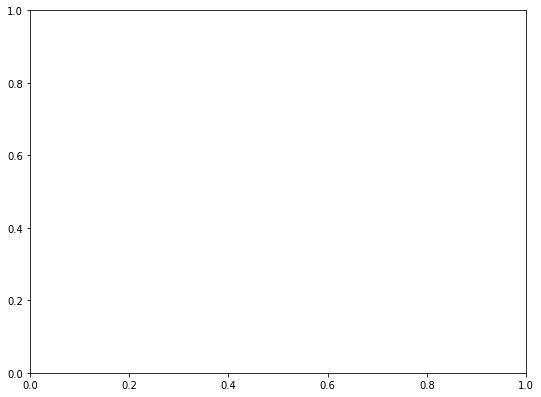

In [3]:
format_string = ".png"
base_dir = os.getcwd()

with open('means.txt', 'w') as f:

    for i in range(m):
        chdir(os.path.join(base_dir, 'posed'))
        posed_data = readcsv(posed_file_list[i])
        posed_data = posed_data.transpose()

        chdir(os.path.join(base_dir, 'spontaneous'))
        spontaneous_data = readcsv(spontaneous_file_list[i])
        spontaneous_data = spontaneous_data.transpose()

        chdir(os.path.join(base_dir, 'graph_result'))
        if not os.path.isdir(spontaneous_file_list[i]):
            os.mkdir(spontaneous_file_list[i])

        chdir(os.path.join(base_dir, spontaneous_file_list[i]))

        for j in range(29):
            plt.hist(posed_data[j,:]*100, 100, density=True, histtype='stepfilled', label='posed')
            plt.hist(spontaneous_data[j,:]*100, 100, density=True, histtype='stepfilled', alpha=0.75, label='spontaneous')
            fig = plt.gcf()
            DPI = fig.get_dpi()
            fig.set_size_inches(640.0/float(DPI),480.0/float(DPI))
            plt.title(type_string[j], size=30)
            plt.xlabel("value", size=30)
            plt.ylabel("density", size=30)
            plt.legend()
            format_string = type_string[j]+format_string
            plt.savefig(format_string, format='png')
            plt.cla()
            format_string = ".png"